# Demo: Python and Jupyter Notebooks

In [1]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# a simple helper function for downloading data from a URL
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [2]:
# read in 'lw.txt' to a variable called "little_women_text"
little_women_text = open('lw.txt').read() # SOLUTION

In [3]:
# see the first three thousand characters
little_women_text[:3000] # SOLUTION NO PROMPT

'The Project Gutenberg EBook of Little Women, by Louisa May Alcott\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: Little Women\n\nAuthor: Louisa May Alcott\n\nPosting Date: September 13, 2008 [EBook #514]\nRelease Date: May, 1996\n[This file last updated on August 19, 2010]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK LITTLE WOMEN ***\n\n\n\n\nLITTLE WOMEN\n\n\nby\n\nLouisa May Alcott\n\n\n\n\nCONTENTS\n\n\nPART 1\n\n          ONE  PLAYING PILGRIMS\n          TWO  A MERRY CHRISTMAS\n        THREE  THE LAURENCE BOY\n         FOUR  BURDENS\n         FIVE  BEING NEIGHBORLY\n          SIX  BETH FINDS THE PALACE BEAUTIFUL\n        SEVEN  AMY\'S VALLEY OF HUMILIATION\n        EIGHT  JO MEETS APOLLYON\n         NINE  MEG GOES TO VANITY FAIR\n          TE

In [4]:
# print the first three thousand characters
print(little_women_text[:3000]) # SOLUTION NO PROMPT

The Project Gutenberg EBook of Little Women, by Louisa May Alcott

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Little Women

Author: Louisa May Alcott

Posting Date: September 13, 2008 [EBook #514]
Release Date: May, 1996
[This file last updated on August 19, 2010]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK LITTLE WOMEN ***




LITTLE WOMEN


by

Louisa May Alcott




CONTENTS


PART 1

          ONE  PLAYING PILGRIMS
          TWO  A MERRY CHRISTMAS
        THREE  THE LAURENCE BOY
         FOUR  BURDENS
         FIVE  BEING NEIGHBORLY
          SIX  BETH FINDS THE PALACE BEAUTIFUL
        SEVEN  AMY'S VALLEY OF HUMILIATION
        EIGHT  JO MEETS APOLLYON
         NINE  MEG GOES TO VANITY FAIR
          TEN  THE P.C. AND P.O.
       ELEVEN  EXPERIMENTS
  

In [5]:
# create a variable "chapters" by splitting the text on 'CHAPTER '
chapters = little_women_text.split('CHAPTER ') # SOLUTION
chapters

["The Project Gutenberg EBook of Little Women, by Louisa May Alcott\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: Little Women\n\nAuthor: Louisa May Alcott\n\nPosting Date: September 13, 2008 [EBook #514]\nRelease Date: May, 1996\n[This file last updated on August 19, 2010]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK LITTLE WOMEN ***\n\n\n\n\nLITTLE WOMEN\n\n\nby\n\nLouisa May Alcott\n\n\n\n\nCONTENTS\n\n\nPART 1\n\n          ONE  PLAYING PILGRIMS\n          TWO  A MERRY CHRISTMAS\n        THREE  THE LAURENCE BOY\n         FOUR  BURDENS\n         FIVE  BEING NEIGHBORLY\n          SIX  BETH FINDS THE PALACE BEAUTIFUL\n        SEVEN  AMY'S VALLEY OF HUMILIATION\n        EIGHT  JO MEETS APOLLYON\n         NINE  MEG GOES TO VANITY FAIR\n          TE

In [6]:
# create a DataFrame with one column -- the chapters
bpd.DataFrame().assign(chapters=chapters) # SOLUTION NO PROMPT

chapters
0   The Project Gutenberg EBook of Little Women, b...
1   ONE\n\nPLAYING PILGRIMS\n\n"Christmas won't be...
2   TWO\n\nA MERRY CHRISTMAS\n\nJo was the first t...
3   THREE\n\nTHE LAURENCE BOY\n\n"Jo!  Jo!  Where ...
4   FOUR\n\nBURDENS\n\n"Oh, dear, how hard it does...
..                                                ...
43  FORTY-THREE\n\nSURPRISES\n\nJo was alone in th...
44  FORTY-FOUR\n\nMY LORD AND LADY\n\n"Please, Mad...
45  FORTY-FIVE\n\nDAISY AND DEMI\n\nI cannot feel ...
46  FORTY-SIX\n\nUNDER THE UMBRELLA\n\nWhile Lauri...
47  FORTY-SEVEN\n\nHARVEST TIME\n\nFor a year Jo a...

[48 rows x 1 columns]

In [7]:
# Counts of names in the chapters of Little Women

counts = bpd.DataFrame().assign(
    Amy=np.char.count(chapters, 'Amy'),
    Beth=np.char.count(chapters, 'Beth'),
    Jo=np.char.count(chapters, 'Jo'),
    Meg=np.char.count(chapters, 'Meg'),
    Laurie=np.char.count(chapters, 'Laurie'),
)
counts

Amy  Beth  Jo  Meg  Laurie
0     0     0   0    0       0
1    23    26  44   26       0
2    13    12  21   20       0
3     2     2  62   36      16
4    14    18  34   17       0
..  ...   ...  ..  ...     ...
43   31     8  61    3      29
44   13     0   9    0      10
45    1     2   6    2       0
46    2     1  56    4       2
47   10     3  37    6      13

[48 rows x 5 columns]

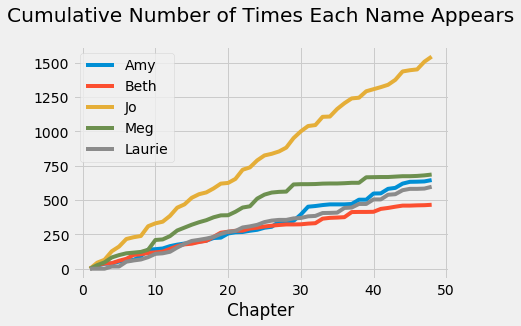

In [8]:
# cumulative number of times each name appears

bpd.DataFrame().assign(
    Amy=np.cumsum(counts.get('Amy')),
    Beth=np.cumsum(counts.get('Beth')),
    Jo=np.cumsum(counts.get('Jo')),
    Meg=np.cumsum(counts.get('Meg')),
    Laurie=np.cumsum(counts.get('Laurie')),
    Chapter=np.arange(1, 49, 1)
).plot(x='Chapter')

plt.title('Cumulative Number of Times Each Name Appears', y=1.08);

# Who would you say is the main character?